In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from scripts_ml.ann_utils import *

In [8]:
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
prefix_time_seq = 'time_2018-04-30_p90_bg_'
valid_code = '_val_24000_6000_'
postfix_time_seq_val = '_190815_70'
postfix_time_seq = '_190812_1616'
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
indexfile = '_fold_indexes'
expname = "MLP_"+preproc_folder+valid_code.split('_val_')[1][:-1]+"_p90"

-Loading preprocessed data...
validation training files: ../data/preproc_traintest/enriched_time_seq/time_2018-04-30_p90_bg__val_24000_6000__traindata_190815_70.pkl
validation testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-04-30_p90_bg__val_24000_6000__testdata_190815_70.pkl
training files: ../data/preproc_traintest/enriched_time_seq/time_2018-04-30_p90_bg__traindata_190812_1616.pkl
testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-04-30_p90_bg__testdata_190812_1616.pkl
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 20)                720       
_________________________________________________________________
dropout_10 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 105       


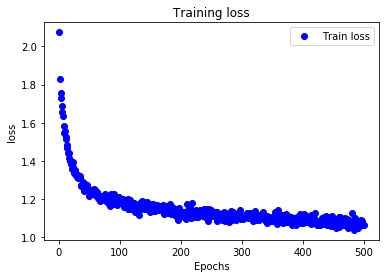

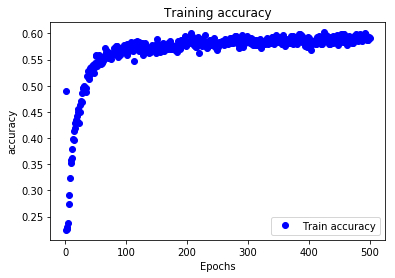

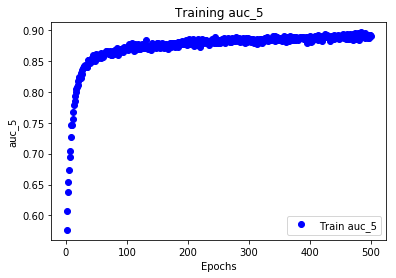

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 20)                720       
_________________________________________________________________
dropout_14 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 105       
_________________________________________________________________
dropout_15 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________
None
-----------------------------VALIDATION FOLD 2 - train on 24000 observations and test on 6000 observations
Early stop

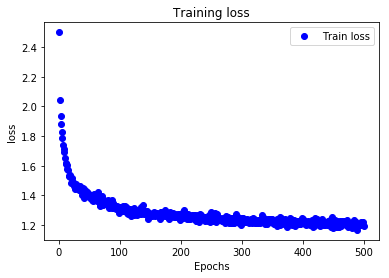

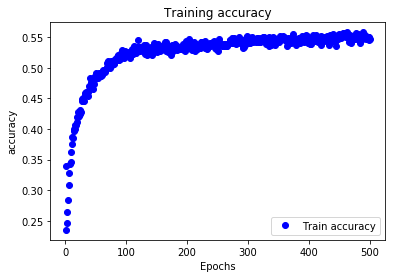

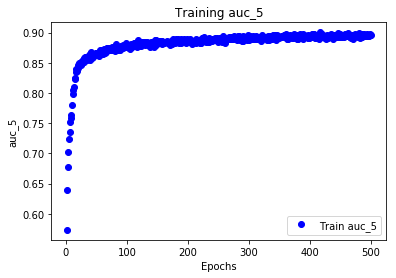

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 20)                720       
_________________________________________________________________
dropout_16 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 105       
_________________________________________________________________
dropout_17 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 6         
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________
None
-----------------------------VALIDATION FOLD 3 - train on 24000 observations and test on 6000 observations
Early stop

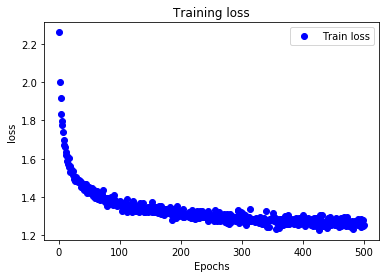

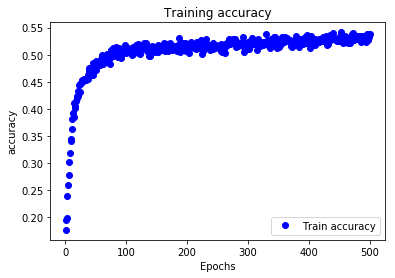

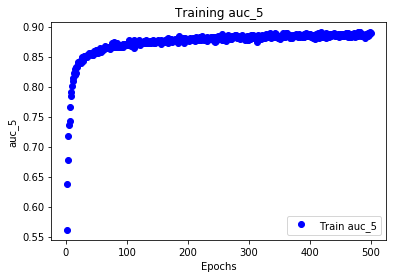

Validation AUC aggregating the results of 3 folds: 0.8911065895157074

Retraining the model using the full training set for proper testing...
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 20)                720       
_________________________________________________________________
dropout_18 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 5)                 105       
_________________________________________________________________
dropout_19 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 6         
Total params: 831
Trainable params: 831
Non-trainable params: 0
______________________________________________

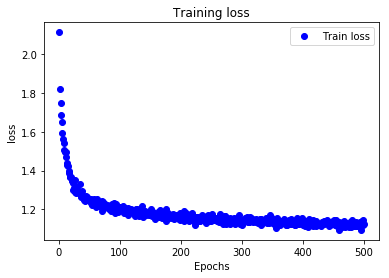

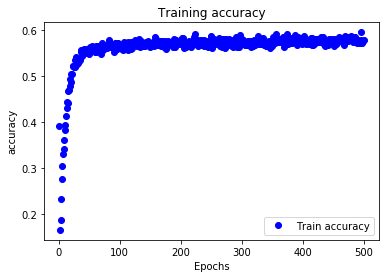

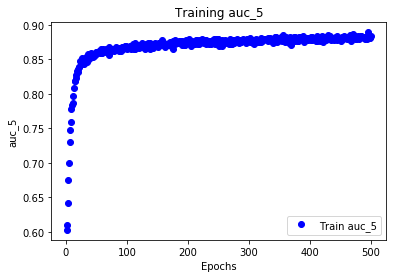

- Saving the model to ../data/models/MLP_enriched_time_seq24000_6000_p90/...
Saving model to ../data/models/MLP_enriched_time_seq24000_6000_p90/time_2018-04-30_p90_bg__sequential_5_190819_735.h5
Prediction performance on 11518 observations from test set
Confusion matrix: 
[[0.57277 0.42723]
 [0.00186 0.01779]]
AUC 0.829
Confusion matrix:
[[6470 4826]
 [  21  201]]
- Activating existing experiment 'MLP_enriched_time_seq24000_6000_p90', the following results will be saved in it...
- Tracking the experiment on mlflow...
- Experiment tracked.


In [10]:
experiment = mlp_exp_timeseq(datafolder, prefix_time_seq, postfix_time_seq,
                postfix_time_seq_val, valid_code, indexfile,
                         experiment_name=expname, 
                         hidden_layers_no=2,  #4
                         hidden_nodes=[20, 5],
                         optimizer=Adam(0.001),
                         hl_activations=[tf.nn.relu]*2,       #[tf.nn.relu]*4,
                         dropout=[0.5]*2,            #[0.5]*2,
                         loss_func = tf.keras.losses.BinaryCrossentropy(),
                         metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
                         to_monitor=('accuracy', 0.9),
                         validation_ep=True,
                         epochs=500, 
                         batch_size=64,
                         use_batch_and_steps=False,
                         class_1_weight=25,
                         pred_threshold = 0.55,
                         verbose=0,
                         early_stopping=True, 
                         save_model=True, 
                         save_results_for_viz=False,
                         mlf_tracking=True)